In [1]:
import netcomp as nc
from netcomp.linalg import _eigs as eigs
figures_dir = '/Users/peterwills/google-drive/Research/Graph Distance Study/metrics_paper/figures'

# Spectral Density Plots

We're going to get histogram (density) plots of the spectral of various graphs we compare in Section 3.

# Preferential Attachment

In [2]:
n = 100
m = 6
p = (n-m)*m / (n*(n-1)/2) # so that volume of ER and BA graphs match

evals_PA = []
evals_ER = []

for _ in range(1000):

    G1 = nx.erdos_renyi_graph(n,p)
    G2 = nx.barabasi_albert_graph(n,m)

    A1,A2 = [nx.adjacency_matrix(G) for G in [G1,G2]]
    L1,L2 = [nc.laplacian_matrix(A) for A in [A1,A2]]

    evals1,evecs1 = eigs(L1)
    evals2,evecs2 = eigs(L2)
    
    evals_ER += list(evals1[1:])
    evals_PA += list(evals2[1:])

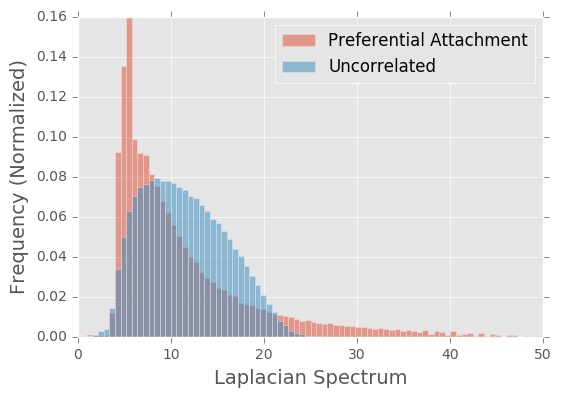

In [3]:
plt.figure(figsize=(6,4))
vals,bins,_ = plt.hist(evals_PA,bins=100,alpha=0.5,normed=True,label='Preferential Attachment');
plt.hist(evals_ER,bins=bins,alpha=0.5,normed=True,label='Uncorrelated');
plt.xlim([0,50]);
plt.xlabel('Laplacian Spectrum');
plt.ylabel('Frequency (Normalized)');
plt.legend();

fig = plt.gcf();
fig.savefig(os.path.join(figures_dir,'pa_spectrum.pdf'),dpi=300,bbox_inches='tight');

# Watts-Strogatz

In [4]:
k = 4
n = 100
p = 0.0404 # to match watts strogatz
beta = 0.1

evals_WS = []
evals_ER = []

for _ in range(1000):

    G1 = nx.erdos_renyi_graph(n,p)
    G2 = nx.connected_watts_strogatz_graph(n,k,beta)

    A1,A2 = [nx.adjacency_matrix(G) for G in [G1,G2]]
#     L1,L2 = [nc.laplacian_matrix(A) for A in [A1,A2]]

    evals1,evecs1 = eigs(A1)
    evals2,evecs2 = eigs(A2)
    
    evals_ER += list(evals1[1:])
    evals_WS += list(evals2[1:])

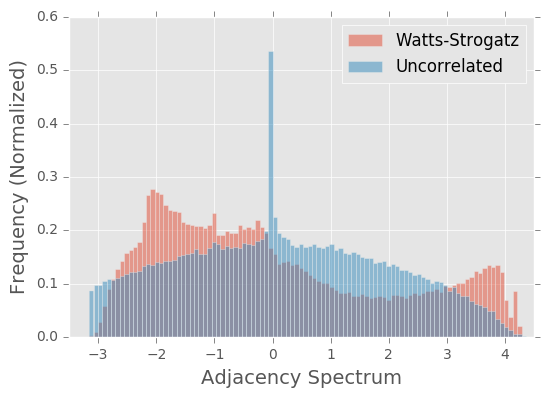

In [5]:
plt.figure(figsize=(6,4))
_,bins,_ = plt.hist(evals_WS,bins=100,alpha=0.5,normed=True,label='Watts-Strogatz');
plt.hist(evals_ER,bins=bins,alpha=0.5,normed=True,label='Uncorrelated');
plt.xlim([-3.5,4.5])
plt.xlabel('Adjacency Spectrum');
plt.ylabel('Frequency (Normalized)');
plt.legend();

fig = plt.gcf();
fig.savefig(os.path.join(figures_dir,'ws_spectrum.pdf'),dpi=300,bbox_inches='tight');

# Lattice

In [6]:
n = 100
N = 10
M = 10

G2 = nx.grid_2d_graph(N,M)
deg_seq = [item[1] for item in G2.degree_iter()]

evals_L = []
evals_ER = []

for _ in range(1000):

    G1 = nx.random_degree_sequence_graph(deg_seq)
    # G2 is deterministic

    A1,A2 = [nx.adjacency_matrix(G) for G in [G1,G2]]

    evals1,evecs1 = eigs(A1)
    evals2,evecs2 = eigs(A2) # lazy
    
    evals_ER += list(evals1[1:])
    evals_L += list(evals2[1:])

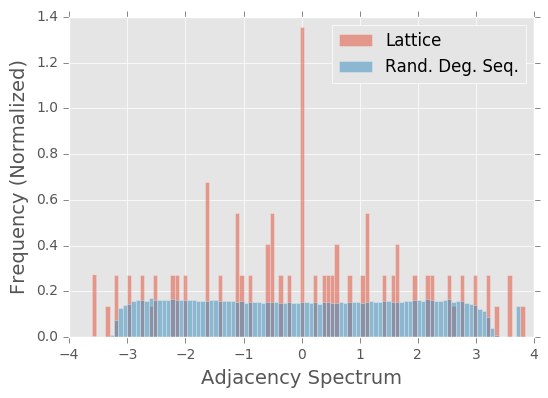

In [7]:
plt.figure(figsize=(6,4))
_,bins,_ = plt.hist(evals_L,bins=100,alpha=0.5,normed=True,label='Lattice');
plt.hist(evals_ER,bins=bins,alpha=0.5,normed=True,label='Rand. Deg. Seq.');
plt.xlabel('Adjacency Spectrum');
plt.ylabel('Frequency (Normalized)');
plt.legend();

fig = plt.gcf();
fig.savefig(os.path.join(figures_dir,'lattice_spectrum.pdf'),dpi=300,bbox_inches='tight');

# SBM

In [8]:
n = 100
p = 0.12

# SBM parameters, must average to p so that we have same volume as ER graph
# (note there are 2 partitions of equal size).
pp = 1.9*p
qq = 0.1*p

evals_SBM = []
evals_ER = []

for _ in range(1000):

    G1 = nx.erdos_renyi_graph(n,p)
    G2 = nx.planted_partition_graph(2,n//2,pp,qq)

    A1,A2 = [nx.adjacency_matrix(G) for G in [G1,G2]]
#     L1,L2 = [nc.laplacian_matrix(A) for A in [A1,A2]]

    evals1,evecs1 = eigs(A1)
    evals2,evecs2 = eigs(A2)
    
    evals_ER += list(evals1[1:])
    evals_SBM += list(evals2[1:])

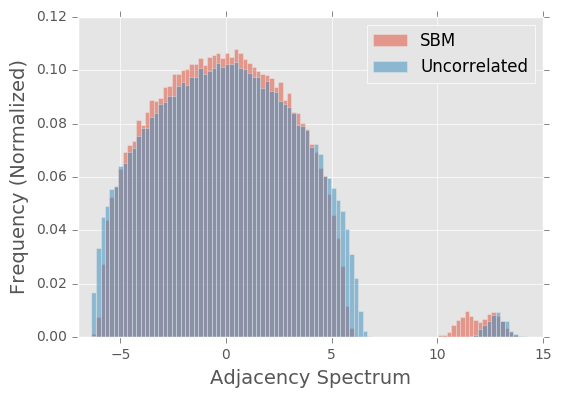

In [9]:
plt.figure(figsize=(6,4))
_,bins,_ = plt.hist(evals_SBM,bins=100,alpha=0.5,normed=True,label='SBM');
plt.hist(evals_ER,bins=bins,alpha=0.5,normed=True,label='Uncorrelated');
plt.xlim([-7,15])
plt.xlabel('Adjacency Spectrum');
plt.ylabel('Frequency (Normalized)');
plt.legend();

fig = plt.gcf();
fig.savefig(os.path.join(figures_dir,'sbm_spectrum.pdf'),dpi=300,bbox_inches='tight');